LINEAR REGRESSION

In [ ]:
#installation script for python packages
pip install numpy
pip install pandas
pip install matplotlib
pip install seaborn 
pip install scikit-learn
pip install jupyterlab

Fetch & Inspect the Data

In [17]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame   # features + target in one DataFrame

In [18]:
df.head();  df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [19]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

 Exploratory Data Analysis (EDA)

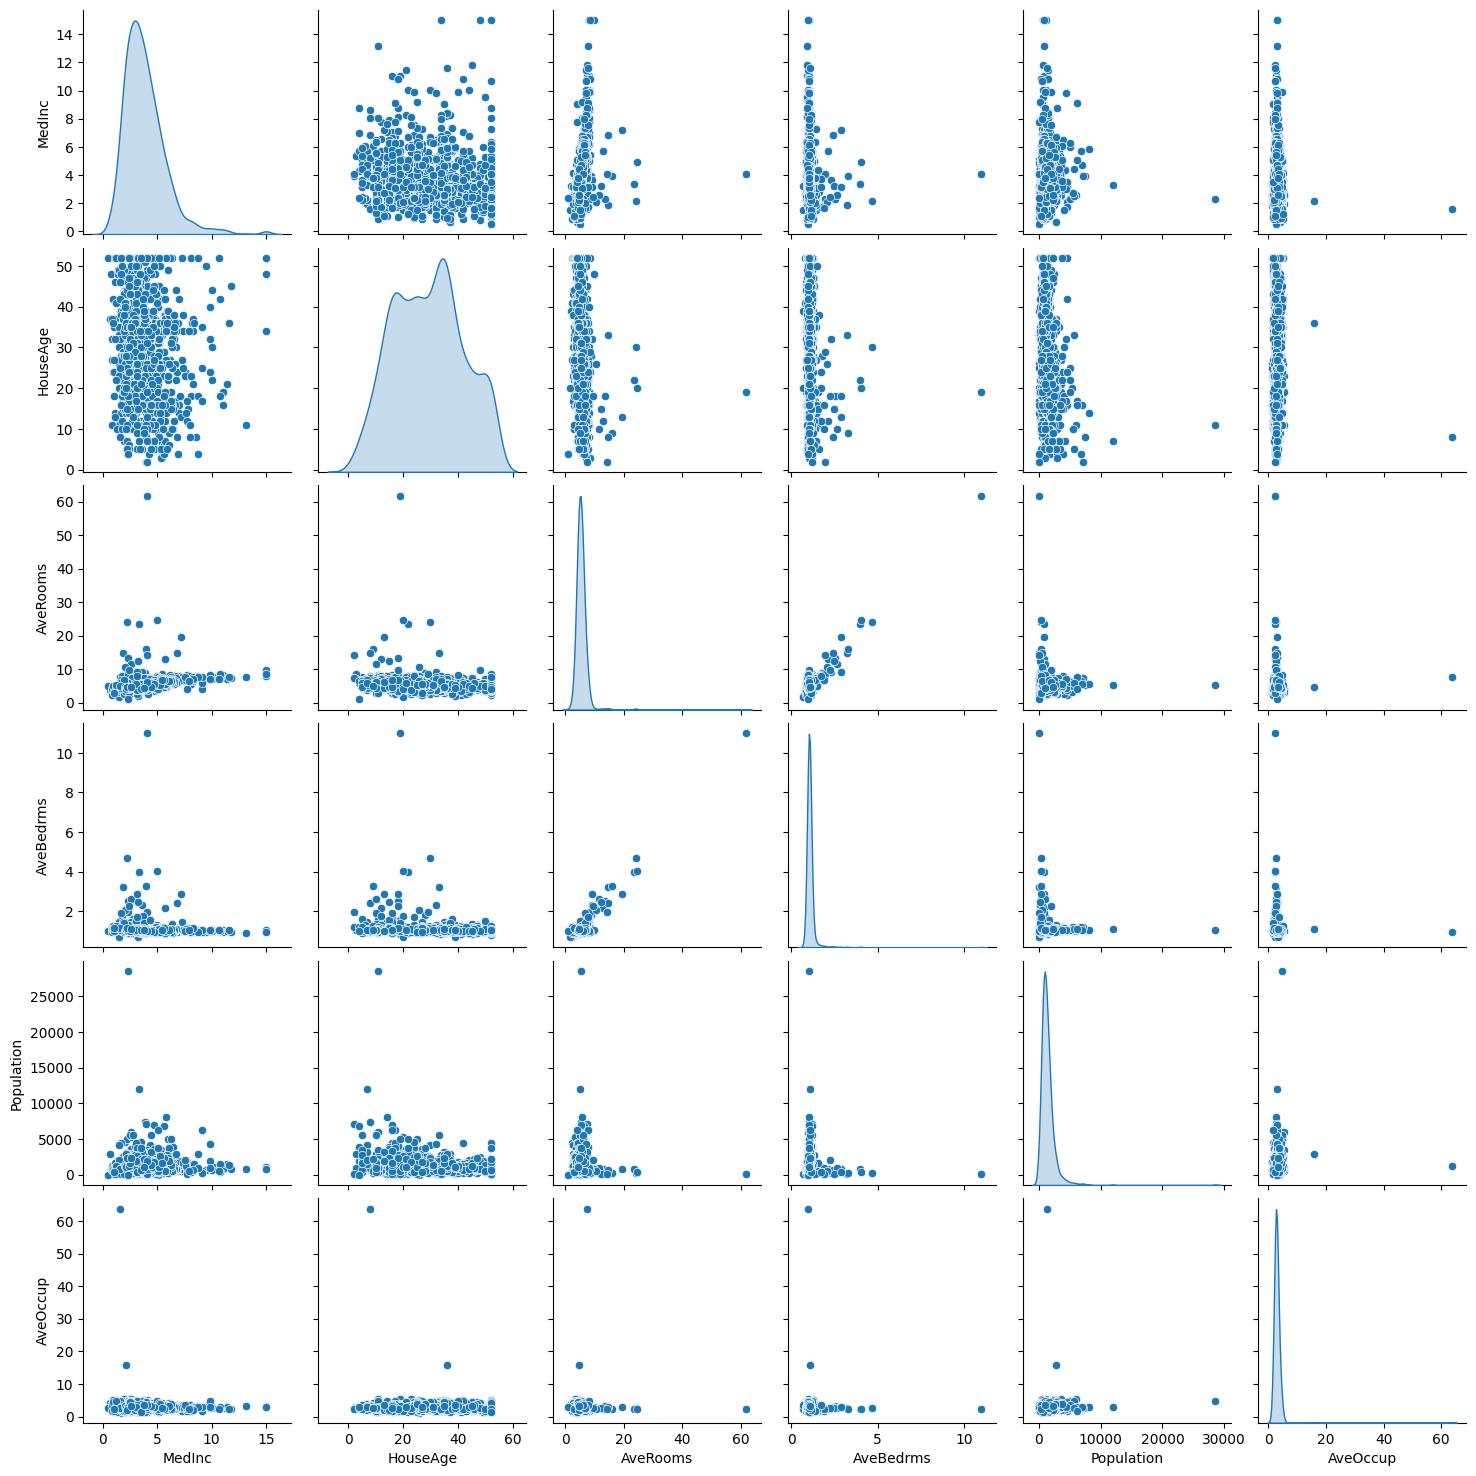

<AxesSubplot:>

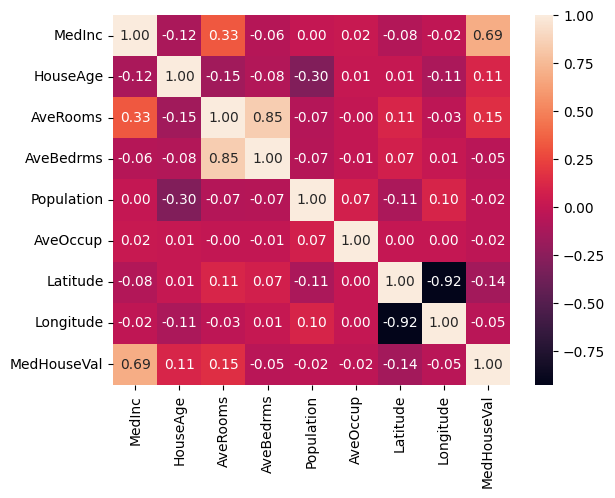

In [20]:
import seaborn as sns, matplotlib.pyplot as plt
sns.pairplot(df.sample(1000), vars=df.columns[:6], diag_kind="kde")
plt.show()
sns.heatmap(df.corr(), annot=True, fmt=".2f")

Pre‑processing

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [ ]:
#Standardize features if you plan to compare with regularized models later(Optional)

"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test  = scaler.transform(X_test)'

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Baseline Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = lr.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R^2 :", r2_score(y_test, y_pred))

RMSE: 0.7455813830127761
MAE : 0.533200130495656
R^2 : 0.5757877060324511


Interpret the Coefficients

In [28]:
coef_df = pd.DataFrame({"feature": data.feature_names,
                        "coefficient": lr.coef_}).sort_values("coefficient", key=abs, ascending=False)
print(coef_df)


      feature  coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
7   Longitude    -0.433708
6    Latitude    -0.419792
2    AveRooms    -0.123323
1    HouseAge     0.009724
5    AveOccup    -0.003526
4  Population    -0.000002
